<a href="https://colab.research.google.com/github/mhdhfzz/Pengembangan-Machine-Learning-Dicoding/blob/main/ML%20Model%20with%20Data%20Time%20Series/ML_Model_With_Data_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Membuat Model Machine Learning dengan Data Time Series**
- Nama: Muhammad Hafiz
- Email: mhdhfz391@gmail.com
- Id Dicoding: mhdhfzz

## **Menyiapkan semua library yang dibutuhkan**

In [ ]:
#dataframe
import pandas as pd
import numpy as np
#split data
from sklearn.model_selection import train_test_split
#preprocessing dan layer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Bidirectional,Dropout
#visualisasi plot
import matplotlib.pyplot as plt

## **Membaca dataset**

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=149nFyUXIkAaGjGW0SawGunSQyFdgJSIF' -O Metro_Interstate_Traffic_Volume.csv

--2023-12-16 04:18:33--  https://docs.google.com/uc?export=download&id=149nFyUXIkAaGjGW0SawGunSQyFdgJSIF
Resolving docs.google.com (docs.google.com)... 74.125.203.102, 74.125.203.100, 74.125.203.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.203.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-4g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bn7cl3g3q6jgg11r1i8fieh8b79sib01/1702700250000/13799905316849870559/*/149nFyUXIkAaGjGW0SawGunSQyFdgJSIF?e=download&uuid=3ea541c3-cf09-4362-bebb-6e8052048a0f [following]
--2023-12-16 04:18:34--  https://doc-04-4g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bn7cl3g3q6jgg11r1i8fieh8b79sib01/1702700250000/13799905316849870559/*/149nFyUXIkAaGjGW0SawGunSQyFdgJSIF?e=download&uuid=3ea541c3-cf09-4362-bebb-6e8052048a0f
Resolving doc-04-4g-docs.googleusercontent.com (doc-04-4g-docs.googleusercontent.com)... 74.125.203.132, 2404:6800:

In [ ]:
#import data ke variabel untuk dibaca
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

#cek 5 data teratas
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [ ]:
df = df[["date_time","temp"]]

In [ ]:
df["date_time"] = pd.to_datetime(df["date_time"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  48204 non-null  datetime64[ns]
 1   temp       48204 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 753.3 KB


<ipython-input-6-927a6251e347>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date_time"] = pd.to_datetime(df["date_time"])


In [ ]:
df['just_date'] = df['date_time'].dt.date

DF=df.drop('date_time',axis=1)
DF.set_index('just_date', inplace= True)
DF.head()

,temp
just_date,
2012-10-02,288.28
2012-10-02,289.36
2012-10-02,289.58
2012-10-02,290.13
2012-10-02,291.14


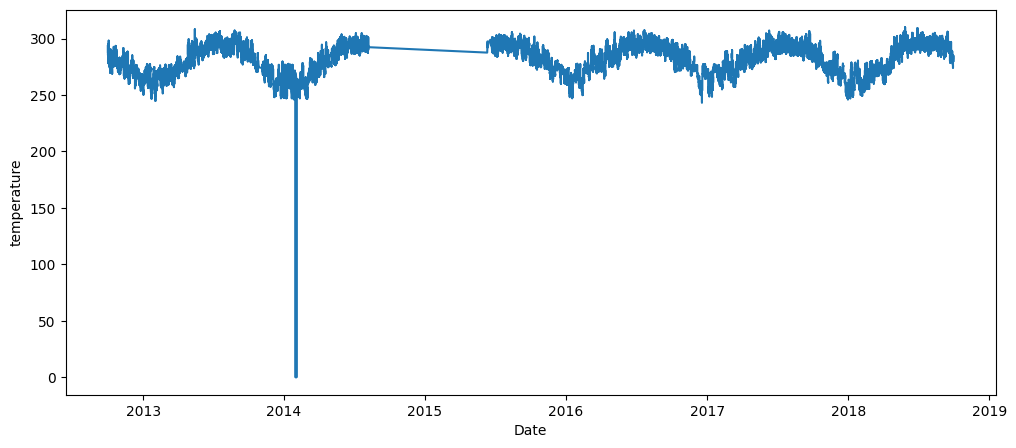

In [ ]:
date = df['just_date'].values
temp = df['temp'].values

plt.figure(figsize=(12,5))
plt.plot(DF)
plt.xlabel('Date')
plt.ylabel('temperature')
plt.show()

## **Splitting Data**

In [ ]:
#Split Dataset
x_train, x_test, y_train, y_test = train_test_split(temp, date, test_size = 0.2, random_state = 0 , shuffle=False)

In [ ]:
#Total data train (80%) dan validation (20%)
print('Total Data Train : ',len(x_train))
print('Total Data Validation : ',len(x_test))

Total Data Train :  38563
Total Data Validation :  9641


## **Pemodelan Sequential**

In [ ]:
#Merubah data untuk dapat diterima model
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=-1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size + 1, shift=1, drop_remainder = True)
  ds = ds.flat_map(lambda w: w.batch(window_size + 1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w: (w[:-1], w[-1:]))
  return ds.batch(batch_size).prefetch(1)

In [ ]:
#Pemodelan Sequential

data_x_train = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=1000)
data_x_test = windowed_dataset(x_test, window_size=60, batch_size=100, shuffle_buffer=1000)

model = Sequential([
    LSTM(64, return_sequences = True, input_shape=(100, 1)),
    Dropout(0.1),
    LSTM(64, return_sequences = True),
    Dropout(0.1),
    Bidirectional(LSTM(64)),
    Dropout(0.1),
    Dense(8, activation = 'relu'),
    Dense(1)
])

In [ ]:
#Menghitung nilai 10% MAE untuk penerapan callback

x = (df['temp'].max() - df['temp'].min()) * 10/100
print(x)

31.006999999999998


In [ ]:
#Penggunaan Callback <10% MAE

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<x and logs.get('val_mae')<x):
      print("\nMAE dari model < 10% skala data")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
#Penggunaan learning rate SGD untuk optimizer
tf.keras.backend.set_floatx('float64')
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

history = model.fit(data_x_train ,epochs=500, validation_data=data_x_test, callbacks=[callbacks])

Epoch 1/500
386/386 [==============================] - 161s 360ms/step - loss: 273.9466 - mae: 274.4466 - val_loss: 247.7819 - val_mae: 248.2819
Epoch 2/500
386/386 [==============================] - 148s 381ms/step - loss: 63.8940 - mae: 64.3868 - val_loss: 11.9198 - val_mae: 12.4155
Epoch 3/500
386/386 [==============================] - ETA: 0s - loss: 9.5185 - mae: 10.0074
MAE dari model < 10% skala data
386/386 [==============================] - 143s 369ms/step - loss: 9.5185 - mae: 10.0074 - val_loss: 11.8229 - val_mae: 12.3207


## **Grafik**

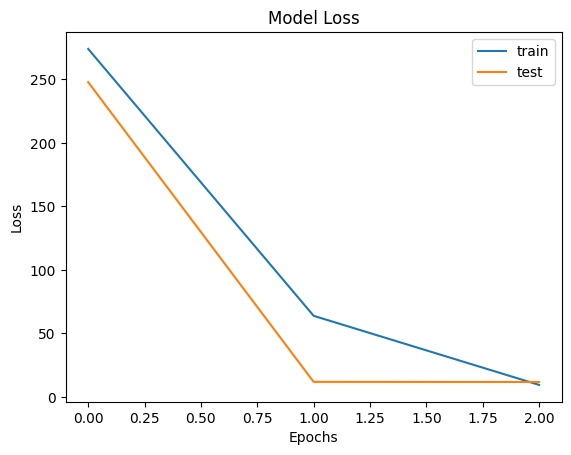

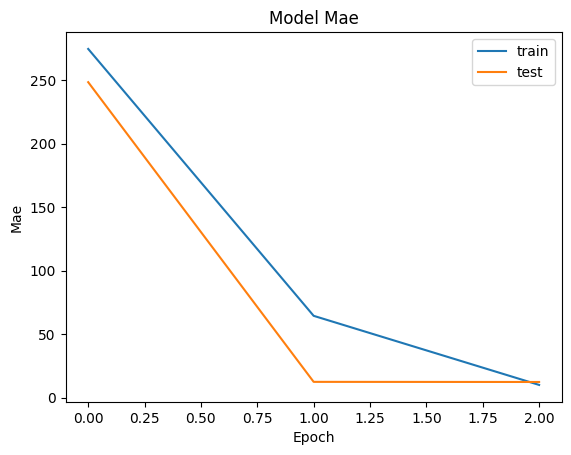

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Mae')
plt.ylabel('Mae')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()